In [6]:
pip install tensorflow pandas scikit-learn matplotlib

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Uninstalling MarkupSafe-2.0.0:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: 'top_level.txt'


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

2024-08-20 14:13:36.391607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 14:13:36.534104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-20 14:13:36.534140: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-20 14:13:36.565524: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 14:13:37.356880: W tensorflow/stream_executor/pla

In [8]:
# Loading the IBM dataset
# Assume you have a CSV file with data containing 'Date' and 'Close' columns
df = pd.read_csv('IBM2017.csv')

In [9]:
# Converting 'Date' column to datetime format and sorting by date
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Using only the 'Close' column for prediction
data = df['Close'].values.reshape(-1, 1)

In [13]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [14]:
# Creating a dataset with time windows
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [15]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the 1D RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

2024-08-20 14:15:09.727233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-20 14:15:09.729623: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-20 14:15:09.729647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-d6ccbe74-5722-4f84-8e54-7da9a834c88a): /proc/driver/nvidia/version does not exist
2024-08-20 14:15:09.732037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
18/18 [==============================] - 2s 57ms/step - loss: 0.0884 - val_loss: 0.0032
Epoch 2/20
18/18 [==============================] - 1s 42ms/step - loss: 0.0219 - val_loss: 0.0027
Epoch 3/20
18/18 [==============================] - 1s 42ms/step - loss: 0.0174 - val_loss: 0.0025
Epoch 4/20
18/18 [==============================] - 1s 42ms/step - loss: 0.0123 - val_loss: 0.0024
Epoch 5/20
18/18 [==============================] - 1s 41ms/step - loss: 0.0132 - val_loss: 0.0023
Epoch 6/20
18/18 [==============================] - 1s 42ms/step - loss: 0.0124 - val_loss: 0.0031
Epoch 7/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0109 - val_loss: 0.0031
Epoch 8/20
18/18 [==============================] - 1s 41ms/step - loss: 0.0089 - val_loss: 0.0019
Epoch 9/20
18/18 [==============================] - 1s 41ms/step - loss: 0.0082 - val_loss: 0.0019
Epoch 10/20
18/18 [==============================] - 1s 38ms/step - loss: 0.0081 - val_loss: 0.0020
Epoch 11/

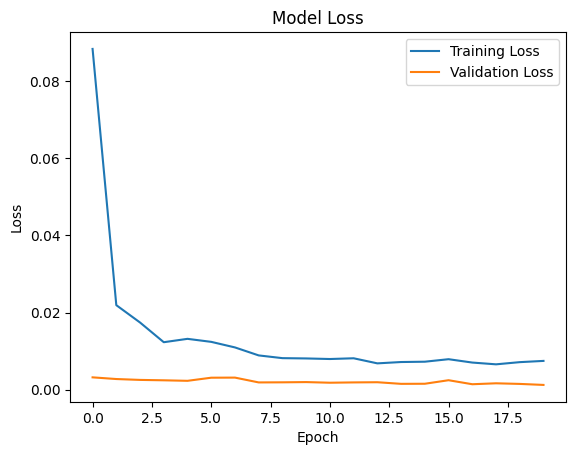

In [17]:

# Visualizing loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Predicting the stock prices on the test set
predicted_prices = model.predict(X_test)

5/5 [==============================] - 0s 8ms/step


In [19]:
# Inversing the scaling to get the actual price values
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

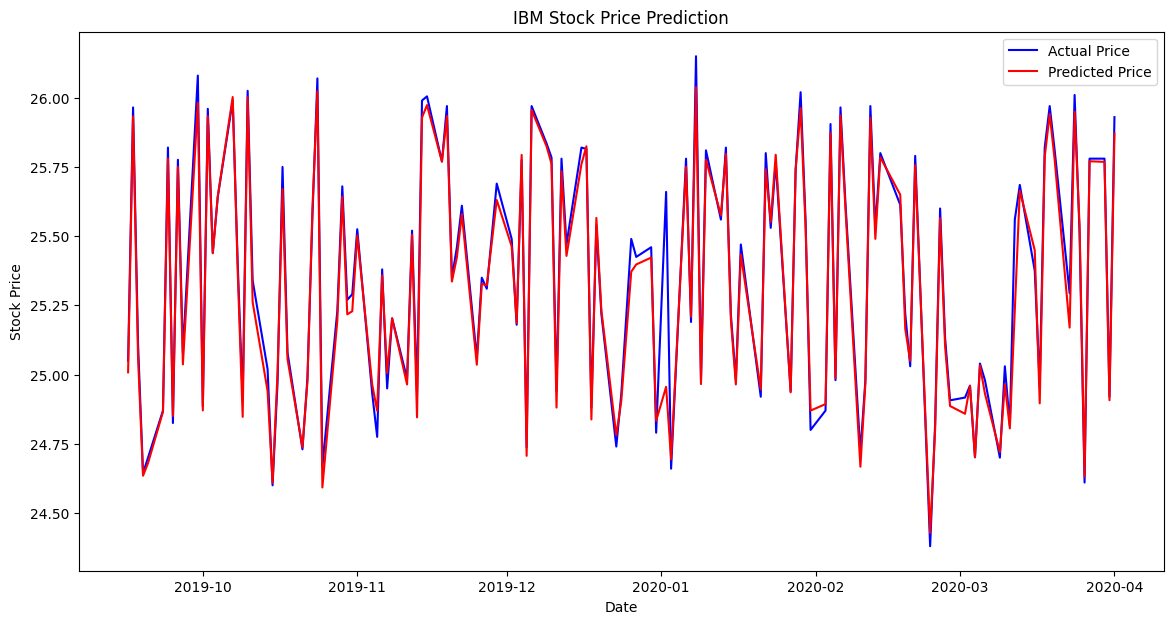

In [20]:
# Plotting the true vs. predicted prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'][-len(y_test):], actual_prices, label='Actual Price', color='blue')
plt.plot(df['Date'][-len(predicted_prices):], predicted_prices, label='Predicted Price', color='red')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Explanation:

    RNN Architecture: The model uses a SimpleRNN layer followed by a Dropout layer to prevent overfitting. The Dense layer at the end outputs the predicted closing price.

    Input Shape: The input shape for the SimpleRNN layer is (time_step, 1), where time_step is the number of previous days used to predict the next closing price.

    Training: The model is trained using the Adam optimizer with Mean Squared Error as the loss function.

    Visualization: After training, the model predicts stock prices on the test set, and the results are visualized by plotting the actual vs. predicted prices.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>